In [ ]:
pip install Unidecode

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/IMDB/Copy of Data.xlsx')
display(df)

,Comment,Sentiment
0,আমার জীবনের সবথেকে ফালতু একটা নাটক এইটা,0.0
1,সাধারণ মানুষ টিভি চ্যানেল গুলো ছুড়ে ফেলে দিয়...,0.0
2,স্টুডেন্ট ওরে একটা থাপ্পড় মারো,0.0
3,নাটকটিতে কথা থেকে মিউজিকের সাউন্ডটা বেশি হয়ে ...,0.0
4,পাকনা মেয়াটা একটা বাজে,0.0
...,...,...
11802,নাটকটার এড দেখে বুঝতে পারছি অনেক ভালো লাগবে,1.0
11803,তিশাকে চশমায় সেই লাগে,1.0
11804,বাংলা নাটক মানেই মনের মধ্যে একটা অন্যরকম অনুভ...,1.0
11805,"দেখা শুরু করলাম,, ভাল না হয়ে যাবে কই অপূর্ব ব...",1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


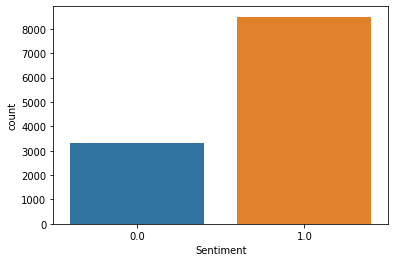

In [ ]:
sns.countplot(df['Sentiment'])

In [ ]:
df['Comment'] = df.Comment.apply(lambda x: preprocessing(str(x)))

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []



train_sentences=train1['Comment'].values
train_labels=train1['Sentiment'].values
for i in range(train_sentences.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)





test_sentences=test1['Comment'].values
test_labels=test1['Sentiment'].values

for i in range(test_sentences.shape[0]): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
    
testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.np_utils.to_categorical(train_labels)


test_labels=keras.utils.np_utils.to_categorical(test_labels)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 9445
Testing Set Length: 2362
training_sentences shape: (9445,)
testing_sentences shape: (2362,)
train_labels shape: (9445, 2)
test_labels shape: (2362, 2)


In [ ]:
print(training_sentences[1])
print(train_labels[0])

 সত্যিই কাদলামগল্পটা অসাধারণ এমন ভালোবাসা পাগল মেয়েগুলো কে পাওয়া অনেক ভাগ্যেরর ব্যপার ভালোবাসাকে এমন ভাবেই ভালোবাসা উচিৎ  প্রত্যেকটা ব্রেকাপের পিছনের একটা গল্প থাকেআর তাই সেই গল্পটাকে ইগনোর না করেহাল ছেড়ে না দিয়ে সম্পর্কটা পুনরায় বহাল করাটা কজনে পারেভালো থাকুক প্রতিটা প্রমিক আত্নাভালো থাকুক প্রতিটা সম্পর্ক ভালো থাকুক সকলের ভালোবাসাভালো থাকুক সকলের ভালোবাসায় মানুষ পূর্ণতা পাক প্রতিটা ভালোবাসার গল্প
[0. 1.]


In [ ]:
vocab_size = 25000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
print(training_sentences.shape)
print(train_labels.shape)

(9445,)
(9445, 2)


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

14853
Word index length:14853


In [ ]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

 অসম্ভব সুন্দর হয়েছে আবারো প্রমানিত হলো গ্রামের কাহিনী নিয়ে তৈরী যেকোনো নাটক বা সিনেমা সবসময় বেস্ট

Sentence Tokenized and Converted into Sequence :--> 

[199, 6, 62, 824, 2615, 128, 1349, 113, 102, 928, 2164, 2, 170, 416, 300, 120]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  199    6   62  824 2615  128 1349  113  102  928 2164    2  170  416
  300  120]


In [ ]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (9445, 100)
Padded shape(testing): (2362, 100)


In [ ]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(2, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          7500000   
                                                                 
 conv1d (Conv1D)             (None, 98, 200)           180200    
                                                                 
 bidirectional (Bidirectiona  (None, 98, 128)          135680    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 50)                6

In [ ]:
   history=model.fit(padded,train_labels,epochs=5,batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/5
37/37 [==============================] - 94s 2s/step - loss: 1.2042 - accuracy: 0.6945 - val_loss: 1.0879 - val_accuracy: 0.7193
Epoch 2/5
37/37 [==============================] - 84s 2s/step - loss: 0.8228 - accuracy: 0.8277 - val_loss: 0.6162 - val_accuracy: 0.9179
Epoch 3/5
37/37 [==============================] - 80s 2s/step - loss: 0.4547 - accuracy: 0.9653 - val_loss: 0.5354 - val_accuracy: 0.9149
Epoch 4/5
37/37 [==============================] - 78s 2s/step - loss: 0.3153 - accuracy: 0.9858 - val_loss: 0.4941 - val_accuracy: 0.9187
Epoch 5/5
37/37 [==============================] - 76s 2s/step - loss: 0.2299 - accuracy: 0.9941 - val_loss: 0.4875 - val_accuracy: 0.9191


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


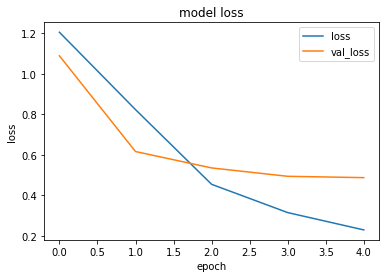

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

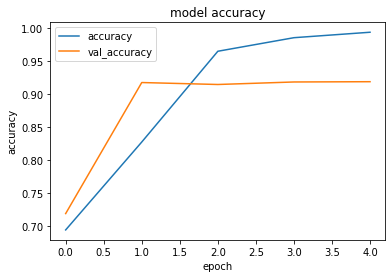

In [ ]:
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

37/37 [==============================] - 20s 528ms/step - loss: 0.1954 - accuracy: 0.9956
The train accuracy is: 0.995553195476532
10/10 [==============================] - 5s 485ms/step - loss: 0.4875 - accuracy: 0.9191
The test accuracy is: 0.9191363453865051


In [ ]:
from keras.layers.convolutional import MaxPooling1D
from keras.layers.recurrent import LSTM, GRU

In [ ]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(32, kernel_size=3, activation = "relu"))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GRU(128,dropout=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          7500000   
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 32)            28832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 32)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 128)               61824     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                      

In [ ]:
   history=model.fit(padded,train_labels,epochs=12,batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/12
37/37 [==============================] - 23s 538ms/step - loss: 0.4852 - accuracy: 0.7543 - val_loss: 0.2789 - val_accuracy: 0.8916
Epoch 2/12
37/37 [==============================] - 19s 516ms/step - loss: 0.1396 - accuracy: 0.9481 - val_loss: 0.1925 - val_accuracy: 0.9217
Epoch 3/12
37/37 [==============================] - 20s 534ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.2118 - val_accuracy: 0.9297
Epoch 4/12
37/37 [==============================] - 21s 560ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.2482 - val_accuracy: 0.9318
Epoch 5/12
37/37 [==============================] - 21s 559ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.2731 - val_accuracy: 0.9289
Epoch 6/12
37/37 [==============================] - 20s 549ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.2890 - val_accuracy: 0.9335
Epoch 7/12
37/37 [==============================] - 21s 567ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.3359 - val_accuracy: 0.9246

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


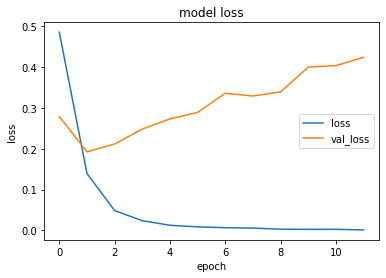

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

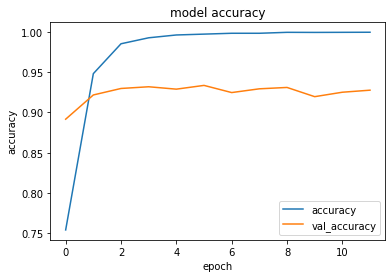

In [ ]:
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

37/37 [==============================] - 4s 109ms/step - loss: 4.4828e-04 - accuracy: 0.9999
The train accuracy is: 0.9998941421508789
10/10 [==============================] - 1s 94ms/step - loss: 0.4239 - accuracy: 0.9276
The test accuracy is: 0.9276037216186523
